# TP 1 

## Ex1

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [2]:
mnist.data.shape

(70000, 784)

In [3]:
mnist.target.shape

(70000,)

In [4]:
mnist.data[:,100]

array([ 0.,  0.,  0., ...,  0.,  0., 95.])

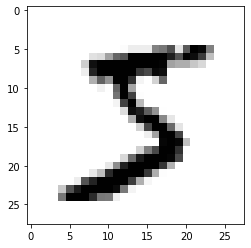

In [5]:
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()

In [6]:
mnist.target[0]

'5'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [3]:
xtrain,  xtest,  ytrain,  ytest  =  train_test_split(mnist.data, mnist.target, 
train_size=0.7)

In [ ]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
clf.predict_proba(xtest)
clf.score(xtest, ytest)

## Ex2

In [3]:
%run plot_analysis.ipynb
import time
import numpy as np
from sklearn.model_selection import KFold

In [4]:
indices = np.random.randint(70000,size=5000)
mnist_5000_data = mnist.data[indices]
mnist_5000_target = mnist.target[indices]
mnist.data.shape

(70000, 784)

In [5]:
x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, 
train_size=0.8)

In [12]:
knn_clf = neighbors.KNeighborsClassifier(10)
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
knn_clf.predict_proba(x_test)
print("score: ", knn_clf.score(x_test, y_test))

y_pred[3]

score:  0.927


'4'

In [14]:
scores = []
for k in range(2,15+1):
    classif = neighbors.KNeighborsClassifier(k)
    classif.fit(x_train, y_train)
    scores.append((k, classif.score(x_test, y_test)))

print(scores)
max(scores, key=lambda x: x[1])

[(2, 0.9675), (3, 0.9693333333333334), (4, 0.9665), (5, 0.9658333333333333), (6, 0.9635), (7, 0.9621666666666666), (8, 0.96), (9, 0.9608333333333333), (10, 0.958), (11, 0.9573333333333334), (12, 0.9561666666666667), (13, 0.956), (14, 0.9551666666666667), (15, 0.9545)]


(3, 0.9693333333333334)

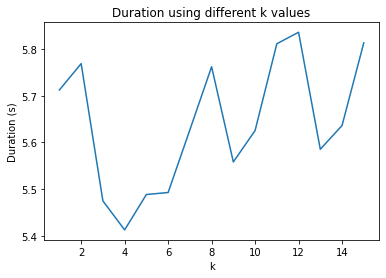

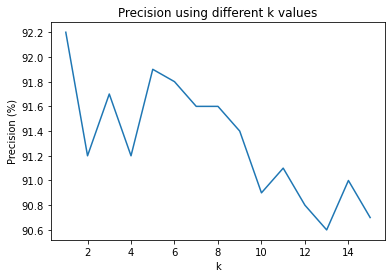

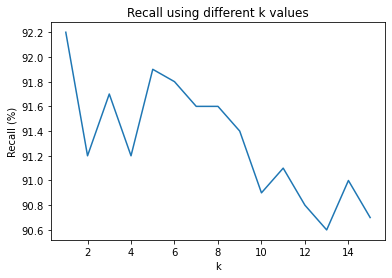

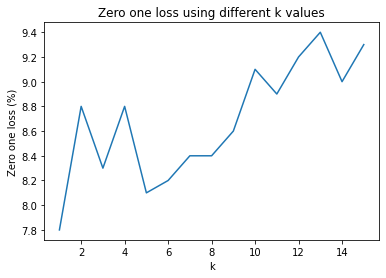

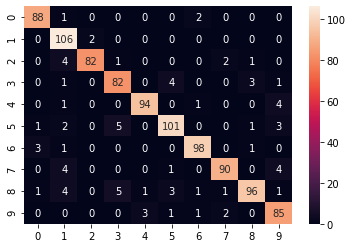

In [15]:
label = []
duration = []
expected = []
actual = []

x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, train_size=0.8)
for k in range(1,15+1):
    start_time = time.time()
    classif = neighbors.KNeighborsClassifier(k)
    classif.fit(x_train, y_train)
    actual.append(classif.predict(x_test))
    expected.append(y_test)
    duration.append(time.time() - start_time)
    label.append(k)

plot_analysis('using different k values', 'k', label, duration, expected, actual)

In [13]:
scores = []
for k in range(2,15+1):
    classif = neighbors.KNeighborsClassifier(k)
    
    cross_validation_score = []
    for train_ind, test_ind in KFold(n_splits=5, shuffle=True).split(mnist_5000_data):
        x_train, x_test = mnist_5000_data[train_ind], mnist_5000_data[test_ind]
        y_train, y_test = mnist_5000_target[train_ind], mnist_5000_target[test_ind]
        
        classif.fit(x_train, y_train)
        cross_validation_score.append(classif.score(x_test, y_test))
    
    scores.append((k, np.mean(cross_validation_score)))

print(scores)
max(scores, key=lambda x: x[1])

AxisError: axis 2 is out of bounds for array of dimension 1

[(0.5, 0.9572333333333334), (0.3333333333333333, 0.9619666666666666), (0.25, 0.9646999999999999), (0.2, 0.9653666666666666), (0.16666666666666666, 0.9663999999999998), (0.14285714285714285, 0.9658667018464813), (0.125, 0.9673), (0.1111111111111111, 0.9670000893310687), (0.1, 0.9677666666666667), (0.09090909090909091, 0.9671997747184297), (0.08333333333333333, 0.9678000000000001), (0.07692307692307693, 0.9676000576024918), (0.07142857142857142, 0.9675334902976591), (0.06666666666666667, 0.9681666666666668), (0.0625, 0.9684666666666666), (0.058823529411764705, 0.9682001223530016), (0.05555555555555555, 0.9677998773994703), (0.05263157894736842, 0.9684331181356061), (0.05, 0.968)]
best % =  (0.0625, 0.9684666666666666)


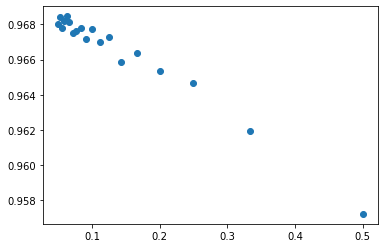

In [16]:
scores = []

classif = neighbors.KNeighborsClassifier(3)
    
for n in range(2, 20+1):     
    cross_validation_score = []
    for train_ind, test_ind in KFold(n_splits=n, shuffle=True).split(mnist_5000_data):
        x_train, x_test = mnist_5000_data[train_ind], mnist_5000_data[test_ind]
        y_train, y_test = mnist_5000_target[train_ind], mnist_5000_target[test_ind]
        
        classif.fit(x_train, y_train)
        cross_validation_score.append(classif.score(x_test, y_test))
    
    scores.append((1/n, np.mean(cross_validation_score)))

print(scores)
print("best % = ", max(scores, key=lambda x: x[1]))
plt.scatter(list(list(zip(*scores))[0]), list(list(zip(*scores))[1]))
plt.show()

In [ ]:
label = []
duration = []
expected = []
actual = []

classif = neighbors.KNeighborsClassifier(3)
for n in range(2, 20+1):
    for train_ind, test_ind in KFold(n_splits=n, shuffle=True).split(mnist_5000_data):
        start_time = time.time()
        x_train, x_test = mnist_5000_data[train_ind], mnist_5000_data[test_ind]
        y_train, y_test = mnist_5000_target[train_ind], mnist_5000_target[test_ind]
        classif.fit(x_train, y_train)
        actual.append(classif.predict(x_test))
        expected.append(y_test)
        duration.append(time.time() - start_time)
        label.append(n)

plot_analysis(label, duration, expected, actual)

In [17]:
list(list(zip(*scores))[0])

[0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05]

[(0.5, 0.9589333333333333), (0.55, 0.9588148148148148), (0.6, 0.9618333333333333), (0.65, 0.9620952380952381), (0.7, 0.96), (0.75, 0.96), (0.8, 0.9645), (0.85, 0.9693333333333334), (0.8999999999999999, 0.9723425524825058), (0.95, 0.9746666666666667)]
best % =  (0.95, 0.9746666666666667)


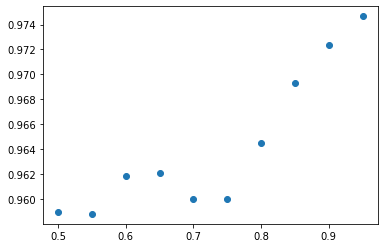

In [18]:
scores = []

classif = neighbors.KNeighborsClassifier(3)
    
for pct in np.linspace(0.5, 0.95, 10):
    x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, train_size=pct)    

    classif.fit(x_train, y_train)
    scores.append((pct, classif.score(x_test, y_test)))

print(scores)
print("best % = ", max(scores, key=lambda x: x[1]))
plt.scatter(list(list(zip(*scores))[0]), list(list(zip(*scores))[1]))
plt.show()

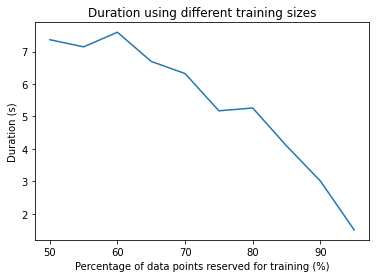

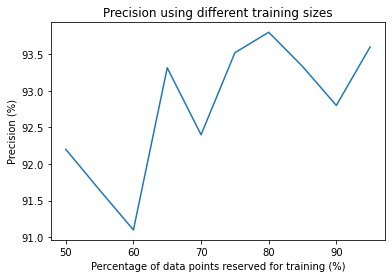

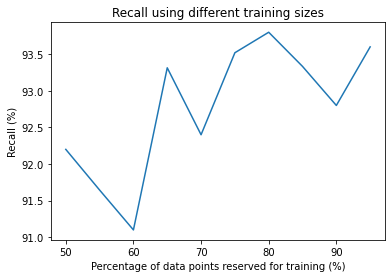

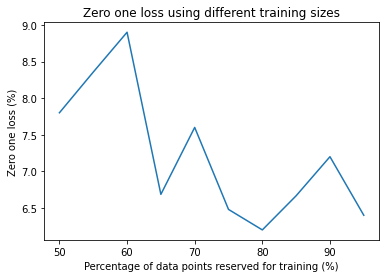

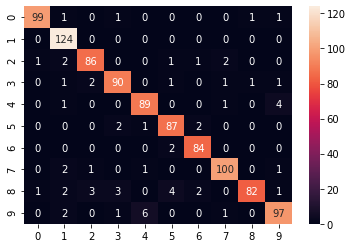

In [6]:
label = []
duration = []
expected = []
actual = []

classif = neighbors.KNeighborsClassifier(3, p=2)
for pct in np.linspace(0.5, 0.95, 10):
    x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, train_size=pct)    
    classif.fit(x_train, y_train)
    start_time = time.time()
    actual.append(classif.predict(x_test))
    expected.append(y_test)
    duration.append(time.time() - start_time)
    label.append(pct * 100)

plot_analysis('using different training sizes', 'Percentage of data points reserved for training (%)', label, duration, expected, actual)

With more samples, the "magic" value seems to converge towards 0.85.

In [ ]:
scores = []
x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, train_size=0.85)    

for p in range(1, 10):
    classif = neighbors.KNeighborsClassifier(3, p=p)

    classif.fit(x_train, y_train)
    scores.append((p, classif.score(x_test, y_test)))

print(scores)
print("best % = ", max(scores, key=lambda x: x[1]))
plt.scatter(list(list(zip(*scores))[0]), list(list(zip(*scores))[1]))
plt.show()

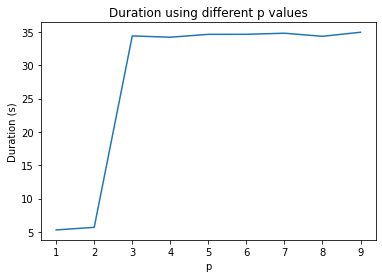

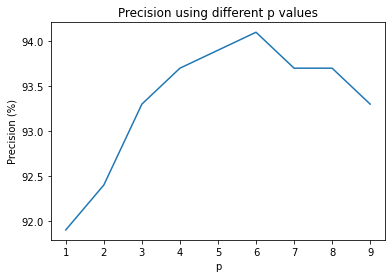

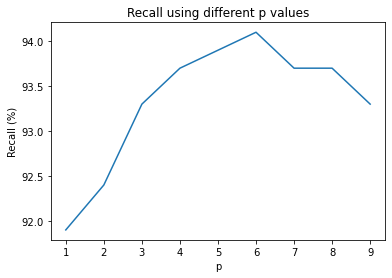

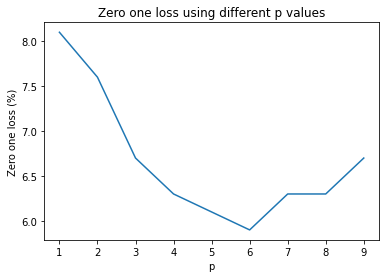

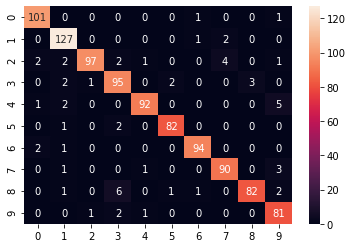

In [13]:
label = []
duration = []
expected = []
actual = []

x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, train_size=0.8)    
for p in range(1, 10):
    start_time = time.time()
    classif = neighbors.KNeighborsClassifier(3, p=p)
    classif.fit(x_train, y_train)
    actual.append(classif.predict(x_test))
    expected.append(y_test)
    duration.append(time.time() - start_time)
    label.append(p)

plot_analysis('using different p values', 'p', label, duration, expected, actual)

In [ ]:
import time

scores = []
x_train,  x_test,  y_train,  y_test  =  train_test_split(mnist_5000_data, mnist_5000_target, train_size=0.85)    

classif = neighbors.KNeighborsClassifier(3, p=6, n_jobs=1)

start = time.time()
classif.fit(x_train, y_train)
end = time.time()
print("score: ", classif.score(x_test, y_test))
print(f"It took me {end-start} seconds to figure that out.")

classif = neighbors.KNeighborsClassifier(3, p=6, n_jobs=-1)

start = time.time()
classif.fit(x_train, y_train)
end = time.time()
print("score: ", classif.score(x_test, y_test))
print(f"It took me {end-start} seconds to figure that out.")

above, even though time is (oddly and incorrectly) the same, `n_jobs=1` takes WAAAYYYY longer to run than `n_jobs=-1`, which is what we expect.

**k-NN**

optimality: `¯\_(ツ)_/¯`

calc time: `¯\_(ツ)_/¯`

scalability: `¯\_(ツ)_/¯`